# 📉 CoT Confidence Decay

Plot how average token log-probabilities change over steps in a CoT trace.

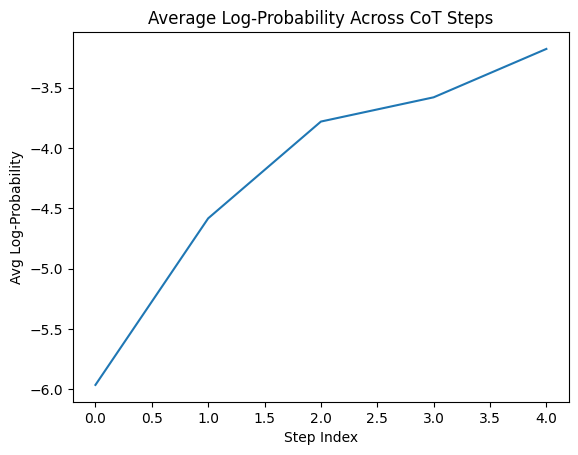

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

def avg_log_probs(text):
    tokens = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens, labels=tokens["input_ids"])
    log_probs = -outputs.loss.item() * tokens["input_ids"].size(1)
    return log_probs / tokens["input_ids"].size(1)

cot_steps = [
    "Q: Jane has 10 pencils. ",
    "She gives away 4 pencils. ",
    "She then buys 2 more pencils. ",
    "How many does she have now? ",
    "A: 8 pencils."
]

logps = [avg_log_probs("".join(cot_steps[:i+1])) for i in range(len(cot_steps))]
plt.plot(logps)
plt.title("Average Log-Probability Across CoT Steps")
plt.xlabel("Step Index")
plt.ylabel("Avg Log-Probability")
plt.show()